Name: Yichao Hou

Course title: Advanced Big Data and Data Mining

Lab assignment title: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook

In [1]:
# I chose Medical Cost Personal Datasets on Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance) for this assignment, and downloaded the csv file as medical_insurance.csv
import pandas as pd

df = pd.read_csv('medical_insurance.csv')
df.head(5)

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372


I decided to draw a pie chart of gender to show the composition of the dataset, and a histogram of premium to quickly visualize its distribution

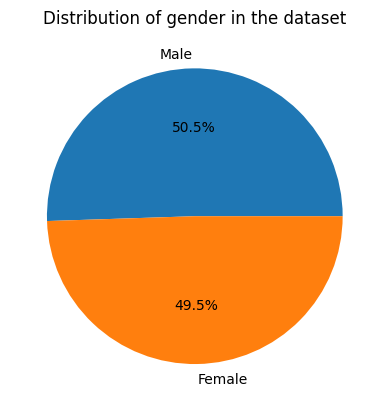

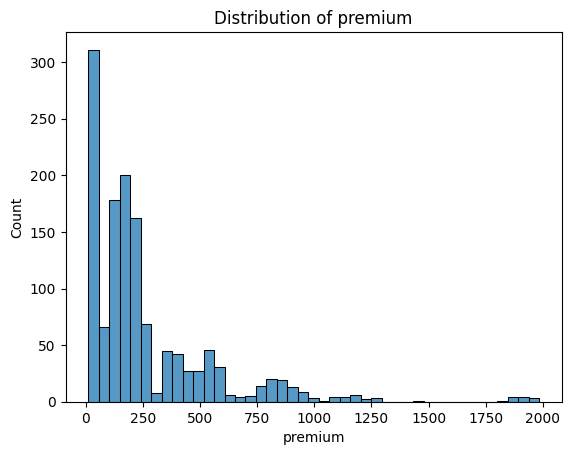

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# drawing the pie chart
male_count = len(df[df['gender'] == 'male']) # count number of male
female_count = len(df[df['gender'] == 'female']) # count number of female
plt.pie([male_count, female_count], labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Distribution of gender in the dataset')
plt.show()

# drawing the histogram
sns.histplot(df['premium'])
plt.title('Distribution of premium')
plt.show()

In [3]:
# technically, this step would remove rows with missing values from the dataset.
# however, as the dataset contains no missing value, this step doesn't remove anything
df2 = df.dropna()
print(df)
print(df2)

      age  gender   bmi  children discount_eligibility     region  expenses  \
0      19  female  27.9         0                  yes  southwest  16884.92   
1      18    male  33.8         1                   no  southeast   1725.55   
2      28    male  33.0         3                   no  southeast   4449.46   
3      33    male  22.7         0                   no  northwest  21984.47   
4      32    male  28.9         0                   no  northwest   3866.86   
...   ...     ...   ...       ...                  ...        ...       ...   
1333   50    male  31.0         3                   no  northwest  10600.55   
1334   18  female  31.9         0                   no  northeast   2205.98   
1335   18  female  36.9         0                   no  southeast   1629.83   
1336   21  female  25.8         0                   no  southwest   2007.95   
1337   61  female  29.1         0                  yes  northwest  29141.36   

        premium  
0      168.8492  
1       17.2555

In [4]:
numerical_columns = ['age', 'bmi', 'children', 'expenses', 'premium'] # numerical columns of the dataset

# calculate IQR for each numerical column
q1s = {}
q3s = {}
iqrs = {} # save the Q1s, Q3s, and IQRs for next step
for column in numerical_columns:
    q1s[column] = df2[column].quantile(0.25)
    q3s[column] = df2[column].quantile(0.75)
    iqrs[column] = q3s[column] - q1s[column]
    print(f'IQR of {column}: {iqrs[column]}')

IQR of age: 24.0
IQR of bmi: 8.400000000000002
IQR of children: 2.0
IQR of expenses: 11899.6275
IQR of premium: 255.55465


In [5]:
# remove outliers by iterate over all columns
for column in numerical_columns:
    df2 = df2[(q1s[column] - iqrs[column] * 1.5 < df2[column]) & (df2[column] < q3s[column] + iqrs[column] * 1.5)] # filter outliers out for a column

df2

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1332,52,female,44.7,3,no,southwest,11411.69,228.2338
1333,50,male,31.0,3,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,southeast,1629.83,16.2983


In [6]:
df_sampled = df2.sample(frac=0.1, random_state=0) # sample 10% of the data for further analysis

df_sampled

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
933,45,female,35.3,0,no,southwest,7348.14,146.9628
671,29,female,31.2,0,no,northeast,3943.60,39.4360
1108,26,male,30.0,1,no,southwest,2904.09,29.0409
216,53,female,26.6,0,no,northwest,10355.64,207.1128
721,53,male,36.6,3,no,southwest,11264.54,225.2908
...,...,...,...,...,...,...,...,...
35,19,male,20.4,0,no,northwest,1625.43,16.2543
913,44,female,27.5,1,no,southwest,7626.99,152.5398
976,48,male,40.2,0,no,southeast,7804.16,156.0832
1058,24,female,39.5,0,no,southeast,2480.98,24.8098


In [7]:
df_reduced = df_sampled[['age', 'bmi', 'expenses', 'premium']].copy()
df_reduced

,age,bmi,expenses,premium
933,45,35.3,7348.14,146.9628
671,29,31.2,3943.60,39.4360
1108,26,30.0,2904.09,29.0409
216,53,26.6,10355.64,207.1128
721,53,36.6,11264.54,225.2908
...,...,...,...,...
35,19,20.4,1625.43,16.2543
913,44,27.5,7626.99,152.5398
976,48,40.2,7804.16,156.0832
1058,24,39.5,2480.98,24.8098


In [8]:
df_normalized = df_reduced.copy() # copy the data frame
df_normalized['expenses'] = (df_reduced['expenses'] - df_reduced['expenses'].mean()) / df_reduced['expenses'].std() # calculate z-score for expenses
df_normalized['premium'] = pd.cut(df_reduced['premium'], 10) # bin premium into 10 bins
df_normalized

,age,bmi,expenses,premium
933,45,35.3,-0.333585,"(140.125, 204.578]"
671,29,31.2,-0.774857,"(10.574, 75.672]"
1108,26,30.0,-0.909591,"(10.574, 75.672]"
216,53,26.6,0.056226,"(204.578, 269.031]"
721,53,36.6,0.174031,"(204.578, 269.031]"
...,...,...,...,...
35,19,20.4,-1.075322,"(10.574, 75.672]"
913,44,27.5,-0.297442,"(140.125, 204.578]"
976,48,40.2,-0.274479,"(140.125, 204.578]"
1058,24,39.5,-0.964431,"(10.574, 75.672]"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [10]:
df.describe()

,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


In [21]:
df_numerical = df[['age', 'bmi', 'children', 'expenses', 'premium']] # statistics only make sense for numerical columns
print("Min:\n", df_numerical.min())
print()
print("Max:\n", df_numerical.max())
print()
print("Mean:\n", df_numerical.mean())
print()
print("Median:\n", df_numerical.median())
print()
print("Mode:\n", df_numerical.mode())

Min:
 age           18.0000
bmi           16.0000
children       0.0000
expenses    1121.8700
premium       11.2187
dtype: float64

Max:
 age            64.0000
bmi            53.1000
children        5.0000
expenses    63770.4300
premium      1983.1064
dtype: float64

Mean:
 age            39.207025
bmi            30.665471
children        1.094918
expenses    13270.422414
premium       262.874685
dtype: float64

Median:
 age           39.0000
bmi           30.4000
children       1.0000
expenses    9382.0300
premium      174.9974
dtype: float64

Mode:
     age   bmi  children  expenses  premium
0  18.0  27.6       0.0   1639.56  16.3956
1   NaN  33.3       NaN       NaN      NaN


In [30]:
print("Range:\n", df_numerical.max() - df_numerical.min())
print()
print("Q1:\n", df_numerical.quantile(0.25))
print()
print("Q3:\n", df_numerical.quantile(0.75))
print()
print("IQR:\n", df_numerical.quantile(0.75) - df_numerical.quantile(0.25))
print()
print("Variance:\n", df_numerical.var())
print()
print("Standard deviation:\n", df_numerical.std())

Range:
 age            46.0000
bmi            37.1000
children        5.0000
expenses    62648.5600
premium      1971.8877
dtype: float64

Q1:
 age           27.00000
bmi           26.30000
children       0.00000
expenses    4740.28750
premium       87.35425
Name: 0.25, dtype: float64

Q3:
 age            51.0000
bmi            34.7000
children        2.0000
expenses    16639.9150
premium       342.9089
Name: 0.75, dtype: float64

IQR:
 age            24.00000
bmi             8.40000
children        2.00000
expenses    11899.62750
premium       255.55465
dtype: float64

Variance:
 age         1.974014e+02
bmi         3.719027e+01
children    1.453213e+00
expenses    1.466524e+08
premium     8.557508e+04
dtype: float64

Standard deviation:
 age            14.049960
bmi             6.098382
children        1.205493
expenses    12110.011240
premium       292.532178
dtype: float64


In [12]:
df[['age', 'bmi', 'expenses', 'premium']].corr()

,age,bmi,expenses,premium
age,1.000000,0.109341,0.299008,0.530327
bmi,0.109341,1.000000,0.198576,0.177888
expenses,0.299008,0.198576,1.000000,0.854005
premium,0.530327,0.177888,0.854005,1.000000
